In [1]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("H:\FantasyMachineLearning\FantasyFootballMachineLearning\FantasyFootballData.csv")
data = data.fillna(0)

In [3]:
subset = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset['Points']
x = subset.drop(columns = ['Position','Points'])

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 88)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=88)

In [5]:
# Calculated Predictions Based on Random Forest
predictions = rf.predict(x_test)
# Retreive Model Metrics
modeleval(predictions,y_test)

,rmse,r^2,mae,mape,accuracy
0,15.288168,0.949928,9.14,15.738625,84.261375


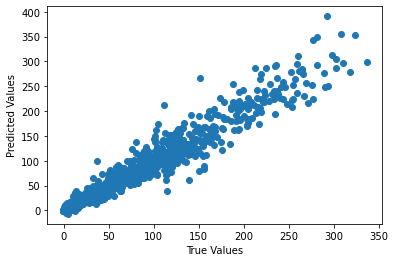

In [6]:
plt.scatter(predictions,y_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

Applying my model to the 2019 Season and comparing the difference between predictive values and actual values

In [26]:
data2019 = pd.read_csv('H:/FantasyMachineLearning/FantasyFootballMachineLearning/2019season.csv')
data2019 = data2019.fillna(0)

In [36]:
subset_2019 = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset_2019['Points']
x = subset_2019.drop(columns = ['Position','Points'])

In [37]:
predictions_2019 = rf.predict(x)
modeleval(predictions_2019,y)

,rmse,r^2,mae,mape,accuracy
0,9.073035,0.983456,4.79,7.914564,92.085436


0       417.0
1       354.0
2       341.0
3       332.0
4       327.0
        ...  
5882      0.0
5883      0.0
5884      0.0
5885      0.0
5886      0.0
Name: Points, Length: 5887, dtype: float64


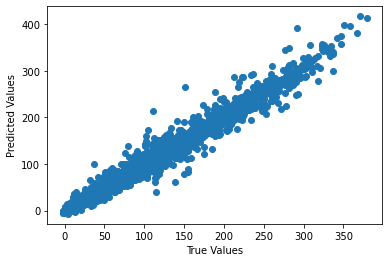

In [31]:
plt.scatter(predictions_2019,y)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [43]:
predpoints = pd.DataFrame(predictions_2019, columns = ["PredictedPoints"])
actualpoints = pd.DataFrame(y, columns = ["ActualPoints"])
actualpoints
pd.concat([predpoints,actualpoints])

,PredictedPoints,ActualPoints
0,371.304,NaN
1,323.033,NaN
2,336.915,NaN
3,333.690,NaN
4,314.358,NaN
...,...,...
5882,0.244,NaN
5883,-0.135,NaN
5884,0.049,NaN
5885,-0.362,NaN
